# Ridge Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

In [2]:
df = pd.read_csv('../../datasets/train_featengin.csv')
df_test = pd.read_csv('../../datasets/test_featengin.csv')

df.drop(columns=['Unnamed: 0'], inplace=True)
df_test.drop(columns=['Unnamed: 0'], inplace=True)

#allows me to scroll (Credit to Andy)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

## Baseline Model

In [3]:
df['base'] = df['saleprice'].mean()

In [4]:
RMSE = np.sqrt(metrics.mean_squared_error(df['saleprice'], df['base']))
RMSE

79276.56098763691

The Baseline model has a Root Mean Squared Error of \\$79,277. On average the predicted sales price is about \\$79,277 off from the true sales price.

## Feature Selection

In [5]:
features = list(df._get_numeric_data().drop(columns = ['id','pid', 'saleprice', 'base', 'lot_frontage']))

In [6]:
X = df[features]
y = df['saleprice']

## Train/Test/Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36)

## Scaling

In [8]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
Z = sc.transform(X)

## Instantiate/Fit Model

In [9]:
alphas = np.logspace(0, 5, 100)

ridge_cv = RidgeCV(alphas = alphas, scoring = 'r2')

ridge_cv.fit(Z_train, y_train);

In [10]:
#Best Alpha
ridge_cv.alpha_

16.297508346206442

In [11]:
#Best Score
ridge_cv.best_score_

0.9103902172830519

In [12]:
ridge_cv.score(Z_train, y_train), ridge_cv.score(Z_test, y_test)

(0.9218374824827559, 0.9165749187102705)

These scores are much higher than the Linear Model. They are fairly close together which means that there is low variance. The high $R^2$ values make me believe that there is low bias. Need to look at a residual plot below to determine if that is true.

## Residuals

In [13]:
pred = ridge_cv.predict(Z_test)

In [14]:
residuals = y_test - pred

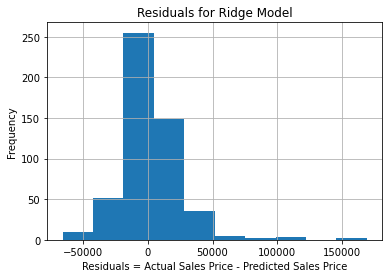

In [15]:
residuals.hist()
plt.title('Residuals for Ridge Model')
plt.xlabel('Residuals = Actual Sales Price - Predicted Sales Price')
plt.ylabel('Frequency');

The residuals are skewed to the right however they are centered around 0 which is what we want as the residual histogram should be showing the chaotic error we cannot control.

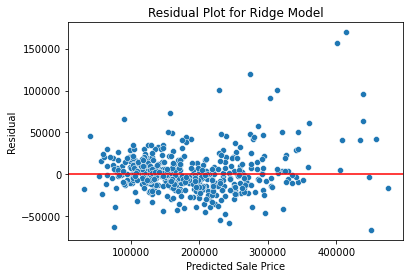

In [16]:
plt.axhline(y = 0, color='r')
sns.scatterplot(x = pred, y = residuals)
plt.title('Residual Plot for Ridge Model')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residual');

According to the residual histogram and the residual scatter plot, there is still some skew and a fair amount of outliers that should be looked at. 

In [17]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
RMSE

23975.34504916462

The Root Mean Squared Error is much smaller. On average, the errors are about \\$23,975 off from the actual sale prices.

## Set up Kaggle Submission

In [18]:
X = df_test[features]
Z = sc.transform(X)

In [19]:
pred = ridge_cv.predict(Z)

In [20]:
df_test['saleprice'] = pred

In [21]:
df_test.head()
ridge_submission = df_test[['id', 'saleprice']]
ridge_submission.head()

,id,saleprice
0,2658,129740.108378
1,2718,164423.191209
2,2414,210837.664693
3,1989,111781.470704
4,625,190770.063650


In [22]:
ridge_submission.set_index('id', inplace=True) 

In [23]:
ridge_submission.to_csv('../../datasets/Model_submissions/ridge_submission.csv') 
